<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer1/blob/main/NasNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import load_model , Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
image_size = 224
batch_size = 64

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.5
)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 2 classes.


In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
)


19993432/19993432 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit_generator(train_generator, epochs=25, validation_data= test_generator, steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),)

Epoch 1/25
625/625 [==============================] - 428s 58ms/step - loss: 1.1383 - accuracy: 0.8017 - val_loss: 0.6798 - val_accuracy: 0.7815
Epoch 2/25
625/625 [==============================] - 410s 131ms/step - loss: 0.8728 - accuracy: 0.8133 - val_loss: 0.6639 - val_accuracy: 0.7815
Epoch 3/25
625/625 [==============================] - 398s 121ms/step - loss: 0.7830 - accuracy: 0.8273 - val_loss: 0.2254 - val_accuracy: 0.8242
Epoch 4/25
625/625 [==============================] - 398s 158ms/step - loss: 0.7383 - accuracy: 0.8617 - val_loss: 0.2798 - val_accuracy: 0.8415
Epoch 5/25
625/625 [==============================] - 396s 131ms/step - loss: 0.6728 - accuracy: 0.8733 - val_loss: 0.2639 - val_accuracy: 0.8604
Epoch 6/25
625/625 [==============================] - 395s 121ms/step - loss: 0.3830 - accuracy: 0.9273 - val_loss: 0.2254 - val_accuracy: 0.9242
Epoch 7/25
625/625 [==============================] - 395s 131ms/step - loss: 0.2044 - accuracy: 0.9368 - val_loss: 0.2002 - 

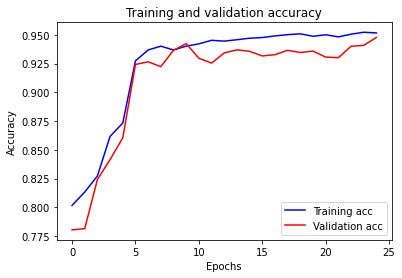

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc ="lower right")
plt.show()

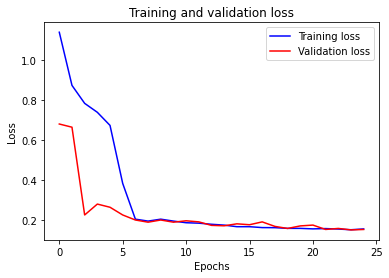

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc ="upper right")
plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/nasnet_malaria.h5')

**Classification Report**

In [ ]:
pred_probabilities = model.predict(test_generator)

625/625 [==============================] - 139s 221ms/step


In [ ]:
pred_probabilities

array([[0.12053162],
       [0.56478643],
       [0.00126593],
       ...,
       [0.5617905 ],
       [0.9434838 ],
       [0.9578665 ]], dtype=float32)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5000
           1       0.94      0.92      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
confusion_matrix(test_generator.classes,predictions)

array([[4727,  273],
       [ 422, 4578]])

**Prediction**

In [ ]:
classes = {
    0 :"parasitized_cell",
    1 : "uninfected_cell"


}

In [ ]:
img2='/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171739_cell_92.png'

In [ ]:
custom = image.load_img(img2, target_size=(224,224,3))

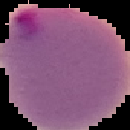

In [ ]:
custom

In [ ]:
custom_arrayformat = image.img_to_array(custom)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom , axis=0) 

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict] 

1/1 [==============================] - 0s 162ms/step


'parasitized_cell'

In [ ]:
img5='/content/drive/MyDrive/TEST/Uninfected/C1_thinF_IMG_20150604_104722_cell_73000 (4280)4.png'

In [ ]:
custom1 = image.load_img(img5, target_size=(224,224,3))

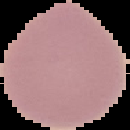

In [ ]:
custom1

In [ ]:
custom_arrayformat = image.img_to_array(custom1)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom1 , axis=0) 

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict] 

1/1 [==============================] - 0s 44ms/step


'uninfected_cell'